In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
%matplotlib inline

Step 01: Load and Explore the Dataset

In [6]:
# Load the dataset

data = pd.read_csv('C:\\Users\\ASUS\\Desktop\\House Price Prediction\\data\\Boston House Prices.csv')

In [7]:
# Display basic information

print('Dataset Shape:', data.shape)

Dataset Shape: (506, 14)


In [ ]:
# Display basic information (Data Types)

print('\nData Types:\n', data.dtypes)


Data Types:
 CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [9]:
# Print First 5 Rows

print('\nFirst 5 Rows:\n', data.head())


First 5 Rows:
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [10]:
# Check for missing values

print('\nMissing Values:\n', data.isnull().sum())


Missing Values:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [11]:
# Basic statistics

print('\nSummary Statistics:\n', data.describe())


Summary Statistics:
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std  

Step 2: Data Visualizations

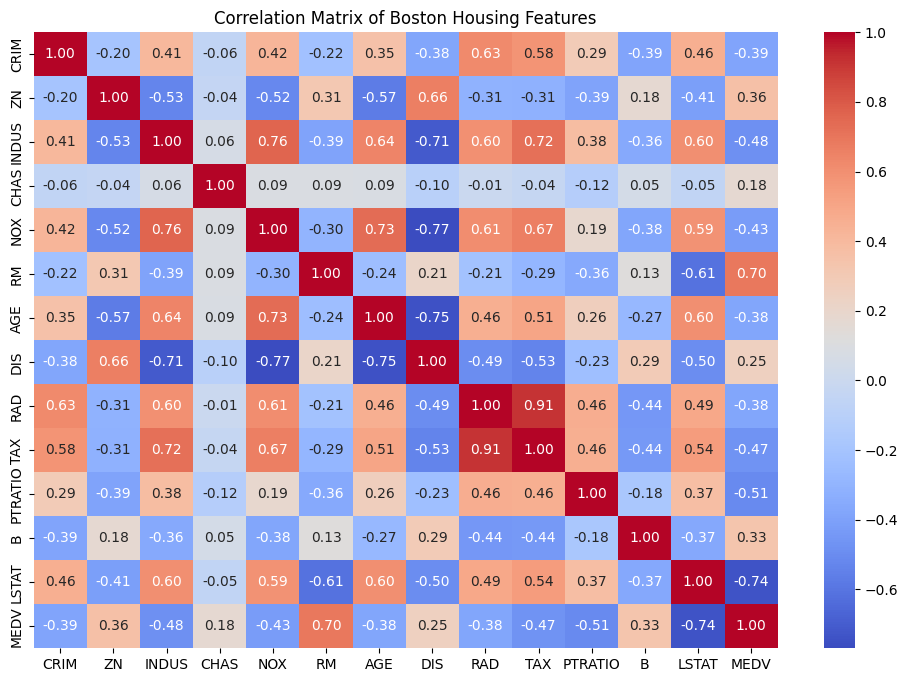

In [12]:
# Correlation matrix heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Boston Housing Features')
plt.show()

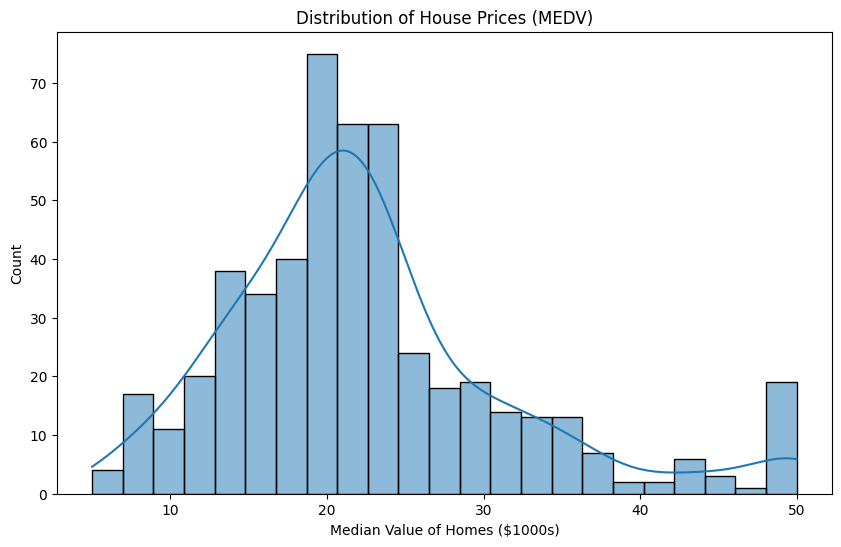

In [13]:
# Distribution of target variable (MEDV)

plt.figure(figsize=(10, 6))
sns.histplot(data['MEDV'], kde=True)
plt.title('Distribution of House Prices (MEDV)')
plt.xlabel('Median Value of Homes ($1000s)')
plt.show()

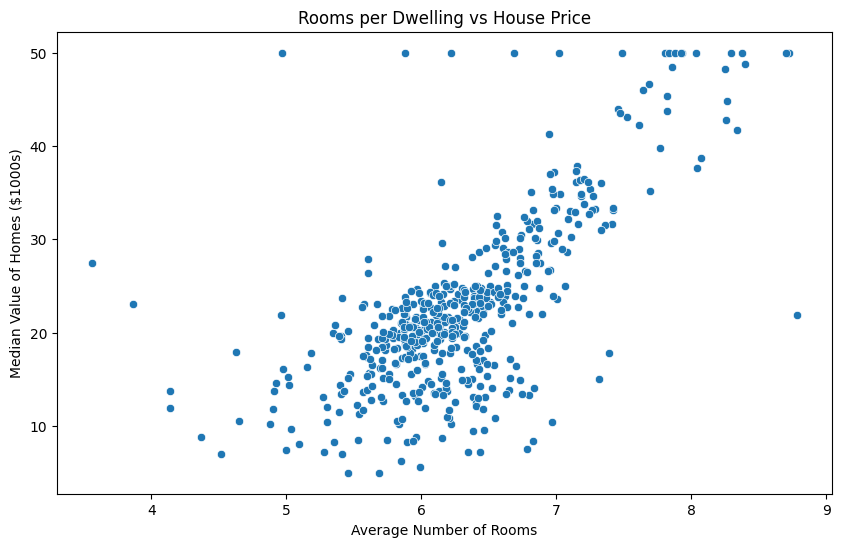

In [14]:
# Scatter plot of RM vs MEDV

plt.figure(figsize=(10, 6))
sns.scatterplot(x='RM', y='MEDV', data=data)
plt.title('Rooms per Dwelling vs House Price')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Value of Homes ($1000s)')
plt.show()

Step 3: Data Preprocessing

In [15]:
# Features and target

X = data.drop('MEDV', axis=1)
y = data['MEDV']

In [16]:
# Check for missing values and handle them (if any)

if X.isnull().sum().sum() > 0:
    X = X.fillna(X.mean())

In [17]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)

Training set shape: (404, 13)
Testing set shape: (102, 13)


Step 4: Model Training and Evaluation

In [20]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Store results
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores).mean()
    
    # Test set predictions
    y_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'CV RMSE': cv_rmse,
        'Test RMSE': test_rmse,
        'Test R2': test_r2
    }
    
    print(f'\n{name} Results:')
    print(f'Cross-Validation RMSE: {cv_rmse:.2f}')
    print(f'Test RMSE: {test_rmse:.2f}')
    print(f'Test R2: {test_r2:.2f}')


Linear Regression Results:
Cross-Validation RMSE: 4.83
Test RMSE: 4.93
Test R2: 0.67

Random Forest Results:
Cross-Validation RMSE: 3.82
Test RMSE: 2.81
Test R2: 0.89


Step 5: Select the Best Model

In [21]:
# Select the best model based on Test RMSE

best_model_name = min(results, key=lambda x: results[x]['Test RMSE'])
best_model = models[best_model_name]

print(f'\nBest Model: {best_model_name}')
print(f'Test RMSE: {results[best_model_name]["Test RMSE"]:.2f}')
print(f'Test R2: {results[best_model_name]["Test R2"]:.2f}')


Best Model: Random Forest
Test RMSE: 2.81
Test R2: 0.89


Save the Best Model

In [24]:
# Save the best model
import pickle

with open('../model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print('Model saved as model.pkl')


Model saved as model.pkl
